# Software Development for A.I.


---


Title: **Health Insurance Premium Prediction using AWS Cloud**


**Important Libraries**



1.   Numpy
* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2.   Pandas

* Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

3. Seaborn

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. scikit-learn

* Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem

5. TensorFlow

* TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [2]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the Dataset 
insurance = pd.read_csv('insurance.csv')

In [4]:
# Quick glance at the data
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Performing Exploratory Data Analysis

<AxesSubplot: >

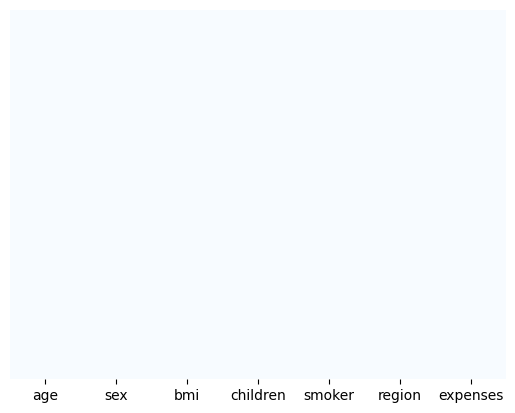

In [5]:
#Checking for null values in the Dataset
sns.heatmap(insurance.isnull(), yticklabels = False, cbar = False, cmap="Blues") 

In [6]:
# Grouping by region to see any relationship between region and charges
region = insurance.groupby(by='region').mean()
region
# It reveals that the south east region has higher BMI values when compared to northeast

/tmp/ipykernel_105/2587700523.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region = insurance.groupby(by='region').mean()


,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [7]:
# Grouping by age
age = insurance.groupby(by='age').mean() 
age

/tmp/ipykernel_105/2356038905.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age = insurance.groupby(by='age').mean()


,bmi,children,expenses
age,,,
18,31.333333,0.449275,7086.217971
19,28.598529,0.426471,9747.909706
20,30.627586,0.862069,10159.697931
21,28.189286,0.785714,4730.464286
22,31.092857,0.714286,10012.932857
23,31.460714,1.000000,12419.820357
24,29.142857,0.464286,10648.015714
25,29.689286,1.285714,9838.365000
26,29.435714,1.071429,6133.825714


In [8]:
# Conversion of categorical value to numerical value to avoid training issues with the machine learning model
insurance['sex'] = insurance['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
# Check unique values in 'region' column
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
region_dummies = pd.get_dummies(insurance['region'], drop_first = True)

In [11]:
insurance = pd.concat([insurance, region_dummies], axis = 1)

In [12]:
insurance.describe()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240,0.428995,0.445181,0.428995
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000,1.000000,1.000000,1.000000


## Plotting the Dataset graph using Seaborn

1. Graphs showing the overview of aspects like Age, Sex, BMI, Children, Smoker, Expenses

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>],
       [<AxesSubplot: title={'center': 'bmi'}>,
        <AxesSubplot: title={'center': 'children'}>],
       [<AxesSubplot: title={'center': 'smoker'}>,
        <AxesSubplot: title={'center': 'expenses'}>]], dtype=object)

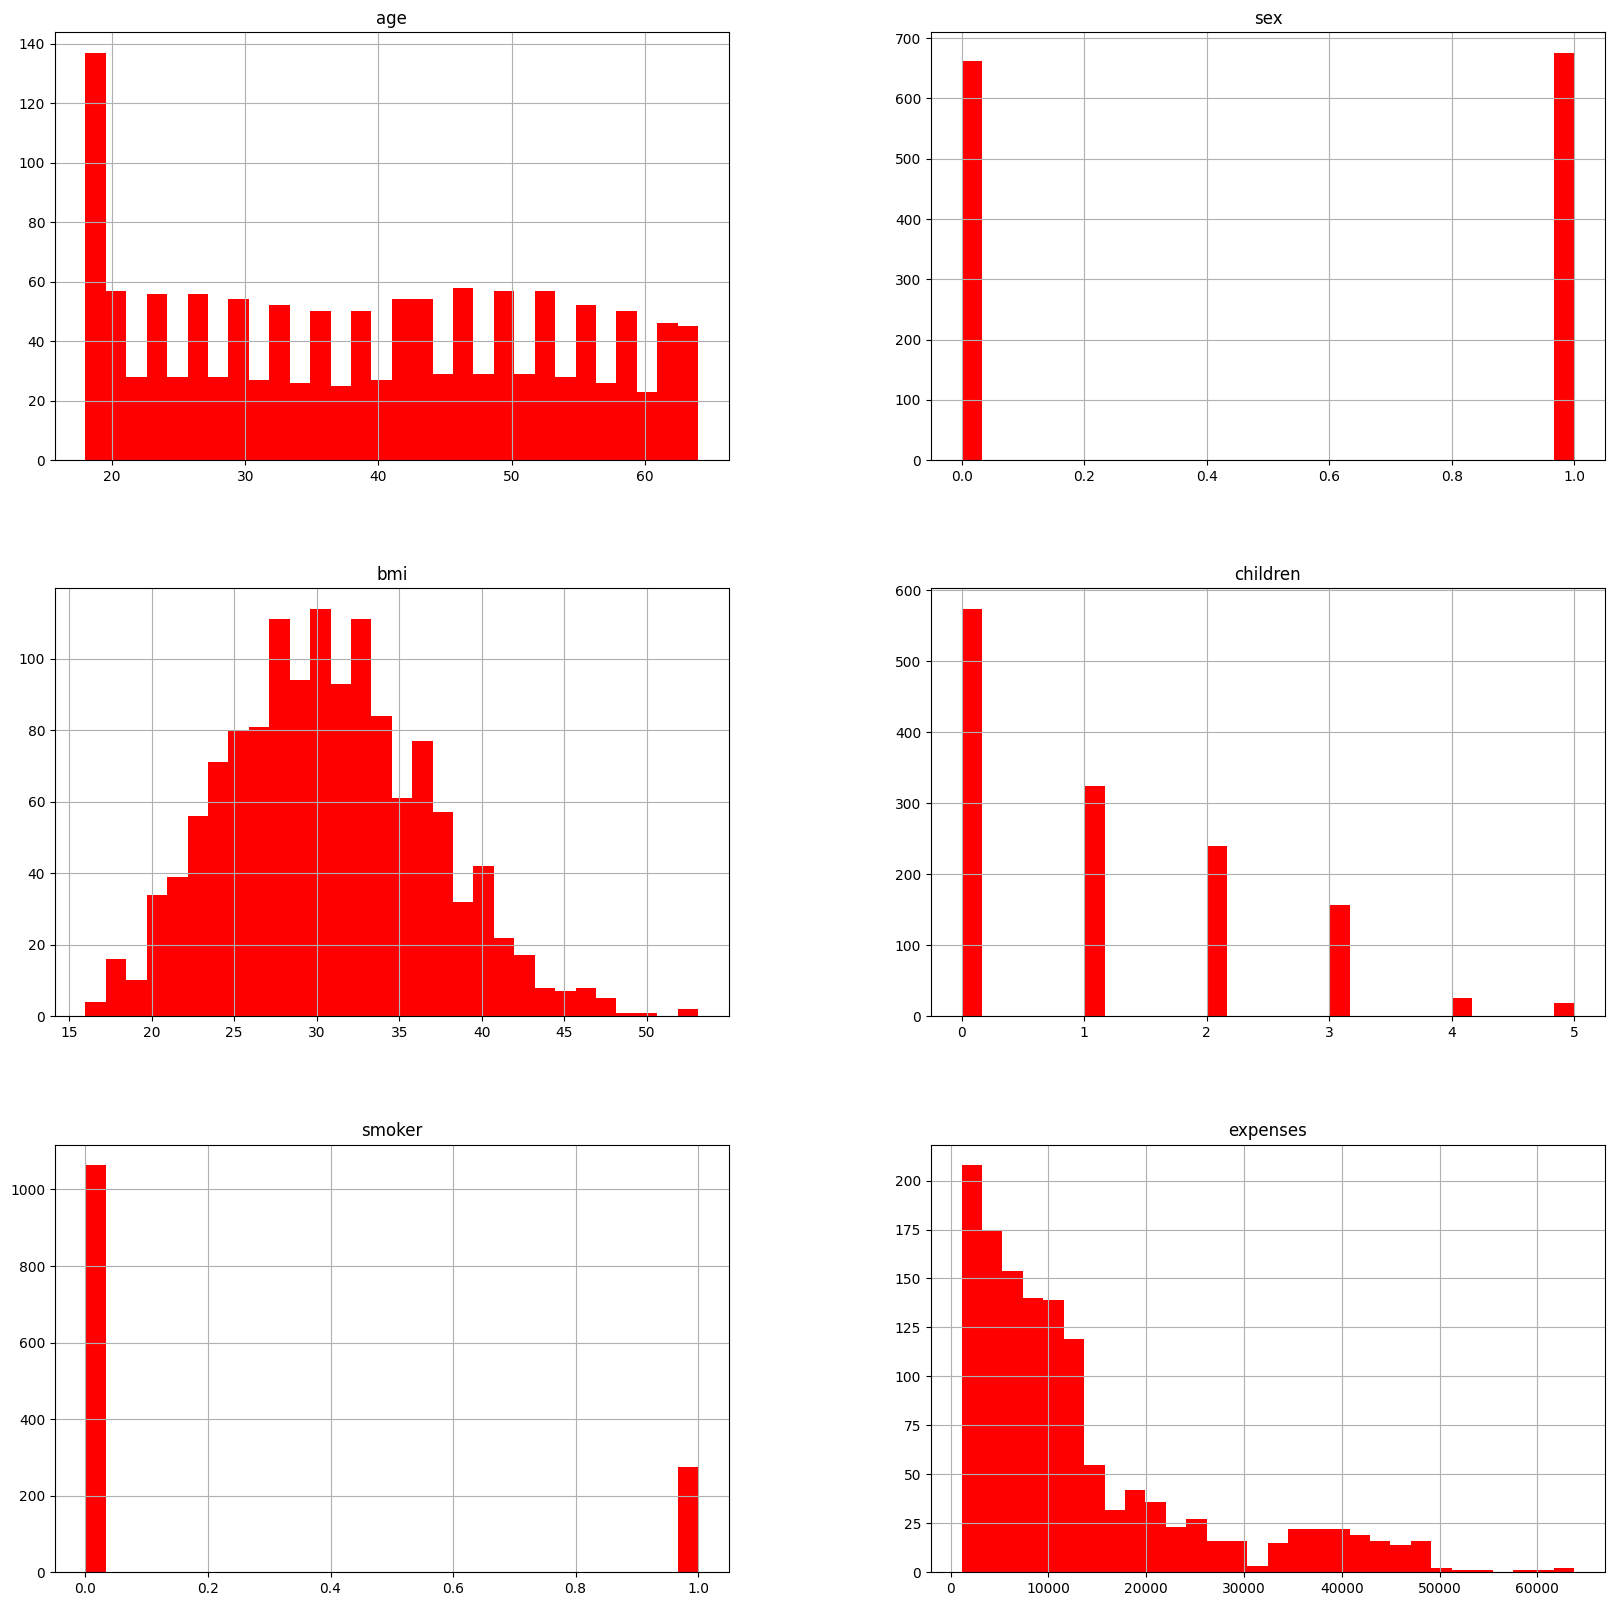

In [13]:
insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'expenses']].hist(bins = 30, figsize = (20,20), color = 'r')

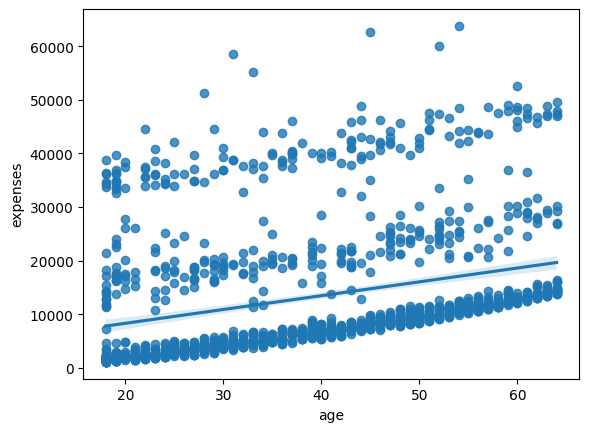

In [14]:
# Plotting age and expenses
sns.regplot(x = 'age', y = 'expenses', data = insurance)
plt.show()

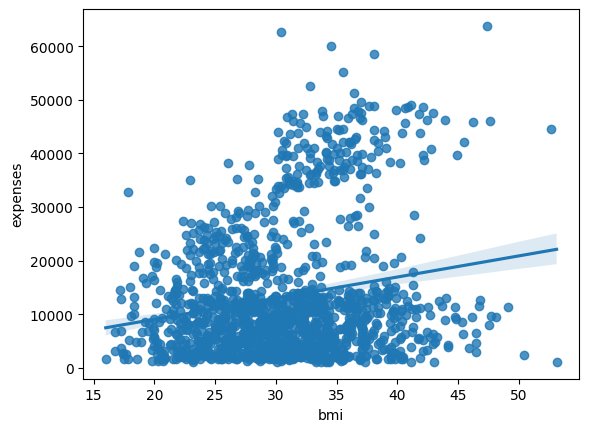

In [15]:
# Plotting BMI and expenses
sns.regplot(x = 'bmi', y = 'expenses', data = insurance)
plt.show()

In [16]:
# Finding the corealation among them
corelation = insurance.corr()
corelation

/tmp/ipykernel_105/2549767591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = insurance.corr()


,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<AxesSubplot: >

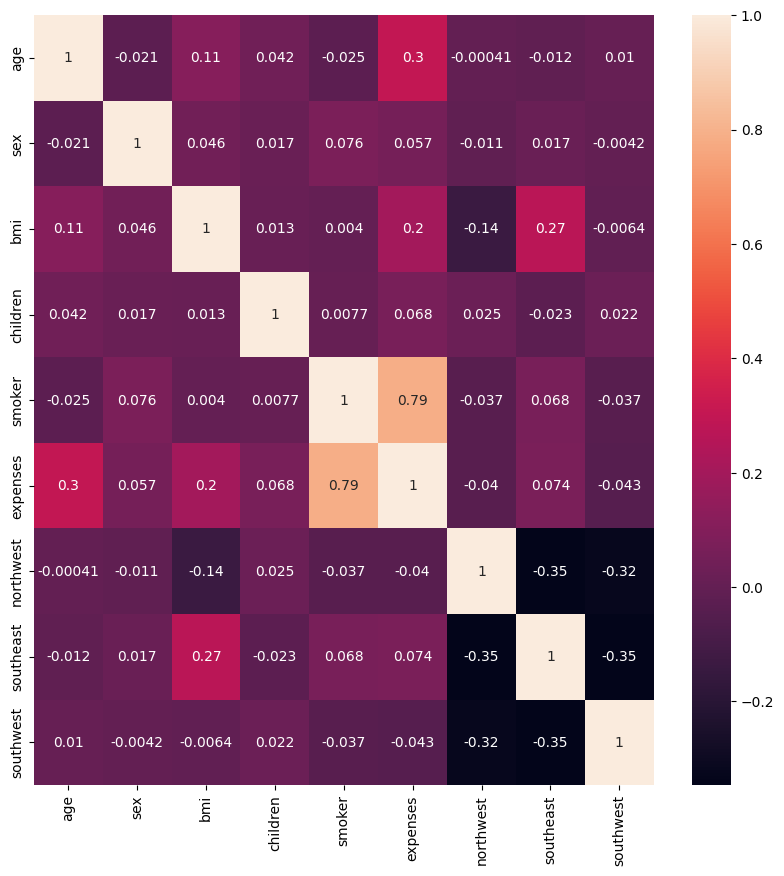

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corelation , annot = True)

In [ ]:
#Dropping Region coloumn
insurance.drop(['region'], axis = 1, inplace = True)

In [ ]:
X = insurance.drop(columns =['expenses'])
y = insurance['expenses']

In [ ]:
# Only take the numerical variables and scale them
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,1
1,18,1,33.8,1,0,0,1,0
2,28,1,33.0,3,0,0,1,0
3,33,1,22.7,0,0,1,0,0
4,32,1,28.9,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,0,0
1334,18,0,31.9,0,0,0,0,0
1335,18,0,36.9,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,1


In [ ]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [31]:
print('Shape of X:')
X.shape

Shape of X:


(1338, 8)

In [32]:
print('Shape of Y:')
y.shape

Shape of Y:


(1338,)

In [33]:
# Converting into Numpy Array
X = np.array(X).astype('float32') 
y = np.array(y).astype('float32')

In [34]:
y = y.reshape(-1,1)

In [35]:
y.shape

(1338, 1)

In [36]:
X

array([[19. ,  0. , 27.9, ...,  0. ,  0. ,  1. ],
       [18. ,  1. , 33.8, ...,  0. ,  1. ,  0. ],
       [28. ,  1. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [18. ,  0. , 36.9, ...,  0. ,  1. ,  0. ],
       [21. ,  0. , 25.8, ...,  0. ,  0. ,  1. ],
       [61. ,  0. , 29.1, ...,  1. ,  0. ,  0. ]], dtype=float32)

# Model Building

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
X_train.shape

(936, 8)

In [40]:
X_test.shape

(402, 8)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [42]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
print("regression model accuracy is " + str(regresssion_model_sklearn_accuracy*100))

regression model accuracy is 72.29441537204815


In [43]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [44]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [45]:
k = X_test.shape[1]
n = len(X_test)
n

402

# Calculating metrics for our regression model

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)

In [47]:
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [48]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6433.626 
MSE = 41391544.0 
MAE = 4358.8115 
R2 = 0.7229441512449756 
Adjusted R2 = 0.7173043375298606


# Using Artificial Neural Network

In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [107]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                450       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [108]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
38/38 [==============================] - 3s 13ms/step - loss: 0.7304 - val_loss: 0.4560
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.4466 - val_loss: 0.3254
Epoch 3/100
38/38 [==============================] - 0s 7ms/step - loss: 0.3499 - val_loss: 0.2671
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2580 - val_loss: 0.2449
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2391 - val_loss: 0.2801
Epoch 6/100
38/38 [==============================] - 0s 9ms/step - loss: 0.2409 - val_loss: 0.2369
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2400 - val_loss: 0.2505
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2139 - val_loss: 0.2317
Epoch 9/100
38/38 [==============================] - 0s 7ms/step - loss: 0.1907 - val_loss: 0.2389
Epoch 10/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2154 - val_loss: 0.2594
Epoch 11

In [109]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

13/13 [==============================] - 0s 2ms/step - loss: 0.1594
Accuracy : 0.840594083070755


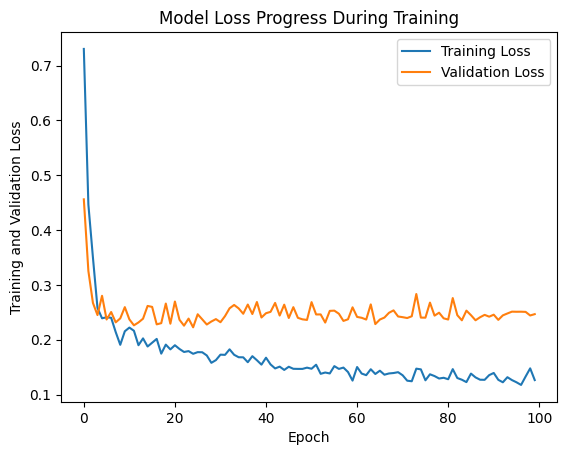

In [110]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

13/13 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

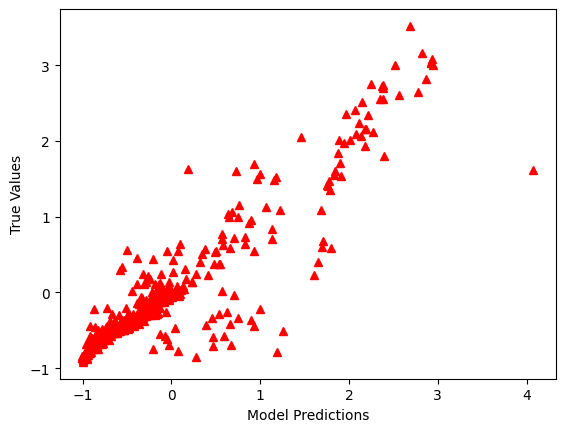

In [111]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

# Deploying to Amazon Sagemaker

In [ ]:
!pip install "sagemaker"
!pip install boto3

In [ ]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()
#Creating a sagemaker session and passing bucket and prefix values

bucket = 'sagemaker-health1' 
prefix = 'linear_learner' 

role = sagemaker.get_execution_role()
print(role)

In [ ]:
import io 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 

In [ ]:
import os

key = 'linear-train-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

In [ ]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This part of code will allow us to use training containers of sagemaker trained model. 

from sagemaker.amazon.amazon_estimator import image_uris
container = image_uris.retrieve(region=boto3.Session().region_name, framework='linear-learner')

In [ ]:
# Parameters are passed using Estimator function that is available to us. 

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

linear.fit({'train': s3_train_data})